# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import pandas as pd

import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

In [2]:
from multiprocessing import Queue

In [3]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
#validation_file = "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)

#with open(validation_file, mode='rb') as f:
#    valid = pickle.load(f)

with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
#X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_validation = train_test_split(X_train, y_train,
                                                  test_size=0.2,
                                                  random_state=42)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 27839
Number of validation examples = 6960
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Sample images


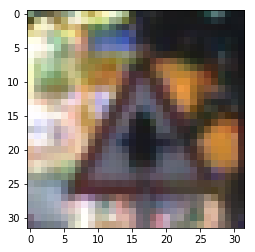

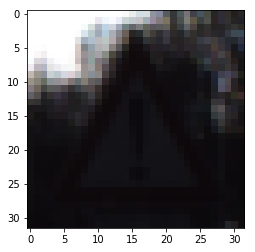

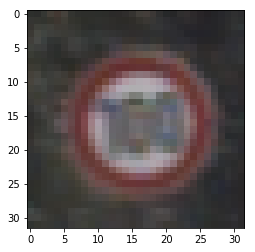

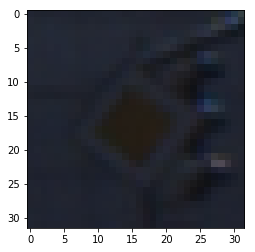

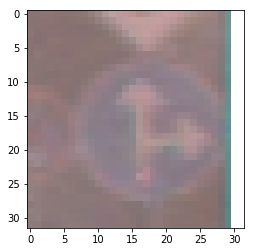

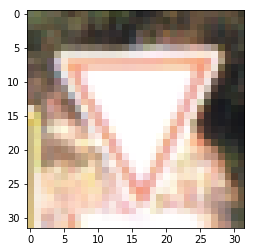

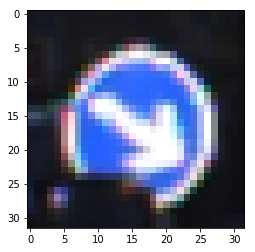

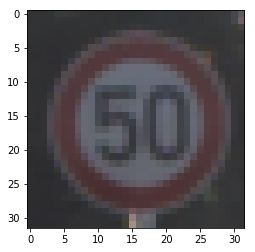

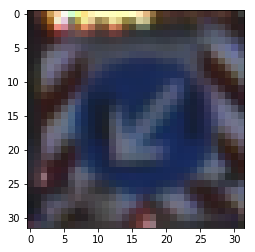

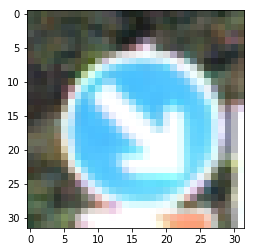

In [6]:
# Plot four sample images

import random

print('Sample images')



for i in range(10):
    index = random.randint(0, len(X_train))
    plt.figure()
    plt.imshow(X_train[index])
    
plt.show()

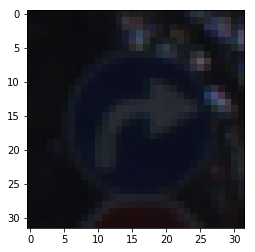

In [7]:
testimg = X_train[100]
plt.imshow(testimg)

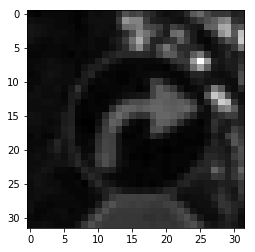

In [8]:
# to make iamges grayscale, just choose single channel
lum_img = testimg[:,:,0]
imgplot = plt.imshow(lum_img, cmap="gray")

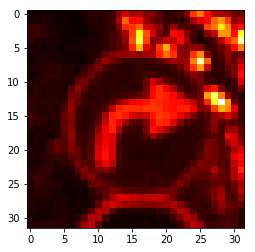

In [9]:
lum_img = testimg[:,:,1]
imgplot = plt.imshow(lum_img, cmap="hot")

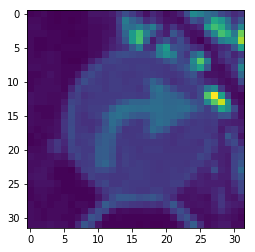

In [10]:
lum_img = testimg[:,:,2]
imgplot = plt.imshow(lum_img)

[]

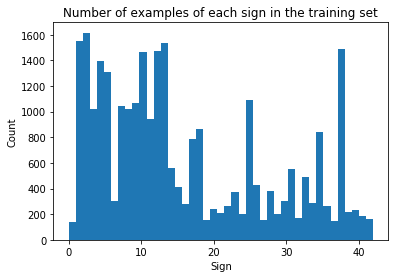

In [11]:
# Plot a histogram of the count of the number of examples of each sign
# in the test set

plt.hist(y_train, bins=n_classes)
plt.title('Number of examples of each sign in the training set')
plt.xlabel('Sign')
plt.ylabel('Count')
plt.plot()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [12]:
'''
Question 1
Describe the techniques used to preprocess the data.
Answer:

1, I converted colored images to grayscale images. 
Color may seem like a useful identifier in determining what the sign is. 

However, since brightness differs so drastically, 
even images of the same sign may have very different color values, 
and so color information may add noise. I tested this empirically, 
and my model performed better with grayscaling the images.


2, I shuffled the data so that it wouldn't be in any patterned order,
such as all of the signs being in a row. 

This would cause problems 
for the training algorithm as we would train the model on batches of
the same image instead of getting a random distribution across iamges.

'''


    
    

"\nQuestion 1\nDescribe the techniques used to preprocess the data.\nAnswer:\n\n1, I converted colored images to grayscale images. \nColor may seem like a useful identifier in determining what the sign is. \n\nHowever, since brightness differs so drastically, \neven images of the same sign may have very different color values, \nand so color information may add noise. I tested this empirically, \nand my model performed better with grayscaling the images.\n\n\n2, I shuffled the data so that it wouldn't be in any patterned order,\nsuch as all of the signs being in a row. \n\nThis would cause problems \nfor the training algorithm as we would train the model on batches of\nthe same image instead of getting a random distribution across iamges.\n\n"

In [13]:

# Shuffle training examples
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [14]:
### converting to grayscale

import cv2
import numpy as np
print("Image Shape: {}".format(X_train[0].shape) + '\n')
orig = X_train[0].shape
test = np.reshape(cv2.cvtColor(X_train[0], cv2.COLOR_BGR2GRAY), (orig[0], orig[1], 1))
print("test shape: {}".format(test.shape) + '\n')
# plt.imshow(test, cmap='gray')
X_train_gray = [np.reshape(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (orig[0], orig[1], 1)) for img in X_train]
X_validate_gray = [np.reshape(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (orig[0], orig[1], 1)) for img in X_valid]
X_test_gray = [np.reshape(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (orig[0], orig[1], 1)) for img in X_test]

print("after grayed Shape: {}".format(X_train_gray[0].shape) + '\n')


Image Shape: (32, 32, 3)

test shape: (32, 32, 1)

after grayed Shape: (32, 32, 1)



In [15]:
print(len(X_train_gray), len(X_validate_gray), len(X_test_gray))

27839 6960 12630


In [16]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 


In [17]:

# Normalisation


# Normalise input (images still in colour)
X_train_gray_norm = (X_train_gray - np.mean(X_train_gray))*1.0 / (np.max(X_train_gray) - np.min(X_train_gray))
X_test_gray_norm = (X_test_gray - np.mean(X_test_gray))*1.0 / (np.max(X_test_gray) - np.min(X_test_gray))

print("before normalization, grayed train Shape: {}".format(X_train_gray[10].shape) + '\n')

print("after normalization, normalized train Shape: {}".format(X_train_gray_norm[10].shape) + '\n')

before normalization, grayed train Shape: (32, 32, 1)

after normalization, normalized train Shape: (32, 32, 1)



In [18]:
X_validation_gray_norm = (X_validate_gray - np.mean(X_validate_gray)) / (np.max(X_validate_gray) - np.min(X_validate_gray))

print("after normalization, grayed Shape in validation dataset: {}".format(X_validation_gray_norm[10].shape) + '\n')

after normalization, grayed Shape in validation dataset: (32, 32, 1)



In [19]:
X_train_color = X_train
X_test_color = X_test


# Normalise input (images still in colour)
X_train_color_norm = (X_train - X_train.mean()) / (np.max(X_train) - np.min(X_train))
X_test_color_norm = (X_test - X_test.mean()) / (np.max(X_test) - np.min(X_test))

print("before normalization, color Shape: {}".format(X_train_color[10].shape) + '\n')

print("after normalization, color Shape: {}".format(X_train_color_norm[10].shape) + '\n')


before normalization, color Shape: (32, 32, 3)

after normalization, color Shape: (32, 32, 3)



In [20]:

def plot_norm_image(image_index):
    """Plots original image on the left and normalised image on the right."""

    plt.figure()
    plt.imshow(X_train_color[image_index])
    
    plt.figure()
    plt.imshow(X_train_color_norm[image_index])
    
    plt.figure()
    plt.imshow(cv2.cvtColor(X_train_gray[image_index],cv2.COLOR_GRAY2RGB))
    
    plt.figure()
    temp = np.array(X_train_gray_norm[image_index], dtype=np.float32)
    plt.imshow(cv2.cvtColor(temp,cv2.COLOR_GRAY2RGB))
    
    plt.show()


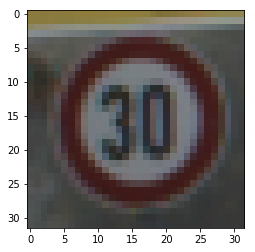

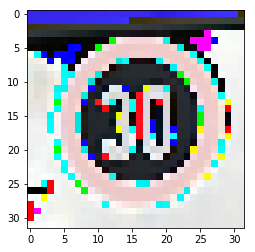

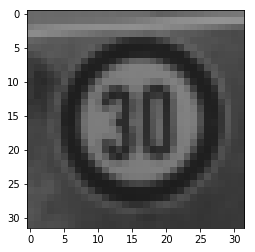

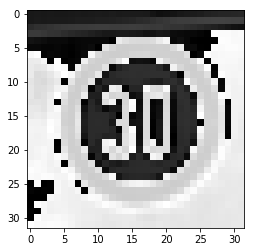

In [21]:
plot_norm_image(100)

### Model Architecture

In [22]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [23]:
'''
Question 2
Describe how you set up the training, validation and testing data for your model. 
If you generated additional data, why?
Answer:

I directly use the validation dataset, instead of splitting training dataset;

I also shuffled the data, as described above, to remove any bias towards patterns in the existing dataset.



'''

'\nQuestion 2\nDescribe how you set up the training, validation and testing data for your model. \nIf you generated additional data, why?\nAnswer:\n\nI directly use the validation dataset, instead of splitting training dataset;\n\nI also shuffled the data, as described above, to remove any bias towards patterns in the existing dataset.\n\n\n\n'

In [24]:
print(len(X_train_gray_norm), len(X_validation_gray_norm), len(X_test_gray_norm))

27839 6960 12630


In [25]:
'''
Question 3
What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.) 
For reference on how to build a deep neural network using TensorFlow, 
see Deep Neural Network in TensorFlow from the classroom.


Answer: because image classification tasks are quite similar, but my traffic sign dataset is much smaller than
ImageNet, so due to Transfer Learning, I only need to input grayscale images and so the number of channels is 1:


so there are 2-layers CNNs + 3-layers full-connections architecture:



Layer 1: Convolutional 32x32x1. The output shape should be 28x28x6.
         Activation = Relu
         Max-Pooling. The output shape should be 14x14x6.
----------------------------------------------------
Layer 2: Convolutional. The output shape should be 10x10x16.
         Activation = Relu
         Max-Pooling. The output shape should be 5x5x16.
----------------------------------------------------
         Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.
         input 400 = 5 * 5 *16, output = 120
----------------------------------------------------
Layer 3: Fully Connected. This should have input 400 = 5 * 5 *16, output = 120
         Activation. 
Layer 4: Fully Connected. This should have input 120, output 84 outputs.
         Activation
Layer 5: Fully Connected (Logits). This should have 43 outputs !
         Activation
----------------------------------------------------------------
         apply dropouts to avoid over-fitting
         
         
'''

"\nQuestion 3\nWhat does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.) \nFor reference on how to build a deep neural network using TensorFlow, \nsee Deep Neural Network in TensorFlow from the classroom.\n\n\nAnswer: because image classification tasks are quite similar, but my traffic sign dataset is much smaller than\nImageNet, so due to Transfer Learning, I only need to input grayscale images and so the number of channels is 1:\n\n\nso there are 2-layers CNNs + 3-layers full-connections architecture:\n\n\n\nLayer 1: Convolutional 32x32x1. The output shape should be 28x28x6.\n         Activation = Relu\n         Max-Pooling. The output shape should be 14x14x6.\n----------------------------------------------------\nLayer 2: Convolutional. The output shape should be 10x10x16.\n         Activation = Relu\n         Max-Pooling. The output shape should be 5x5x16.\n----------------------------------------------------\n         Flatten the output shape 

In [26]:
patch_size = 5
num_channels = 1 #grayscale

depth_conv1 = 6
depth_conv2 = 16

fc_1_output = 120
fc_2_output = 84
fc_3_output = 43

dropout_keepers = .9


In [27]:
def conv2d(x, W, b):
    """Conv2D wrapper, with bias and relu activation"""
    
    # strides = [batch, in_height, in_width, channels]
    x = tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

In [28]:
def fullconnected(x, W, b):
    """Conv2D wrapper, with bias and relu activation"""
    
    x = tf.matmul(x, W)
    x = x + b
    return tf.nn.relu(x)

In [29]:
from tensorflow.contrib.layers import flatten

#------ Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6 -----#
#conv1_W = weights['conv1']
#conv1_b = biases['conv1']
    
#conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
#------ Activation ---------------------------------------------------#
#conv1 = tf.nn.relu(conv1)


def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    weights = {
        'conv1': tf.Variable(tf.truncated_normal([patch_size, patch_size, num_channels, depth_conv1], mean=mu, stddev=sigma)),
        'conv2': tf.Variable(tf.truncated_normal([patch_size, patch_size, depth_conv1, depth_conv2], mean=mu, stddev=sigma)),
        'fc1': tf.Variable(tf.truncated_normal([400, fc_1_output], mean=mu, stddev=sigma)),
        'fc2': tf.Variable(tf.truncated_normal([fc_1_output, fc_2_output], mean=mu, stddev=sigma)),
        'fc3': tf.Variable(tf.truncated_normal([fc_2_output, fc_3_output], mean=mu, stddev=sigma))
    }
    
    biases = {
        'conv1': tf.Variable(tf.zeros([depth_conv1])),
        'conv2': tf.Variable(tf.zeros(shape=[depth_conv2])),
        'fc1': tf.Variable(tf.zeros(shape=[fc_1_output])),
        'fc2': tf.Variable(tf.zeros(shape=[fc_2_output])),
        'fc3': tf.Variable(tf.zeros(shape=[fc_3_output]))
    }

    conv1 = conv2d(x, weights['conv1'], biases['conv1'])
    
    # add dropout 0.9
    #conv1_drop = tf.nn.dropout(conv1, dropout_keepers)
    conv1_drop = tf.nn.dropout(conv1, 0.8)

    #------  Pooling. Input = 28x28x6. Output = 14x14x6.------------------#
    conv1_pooling = tf.nn.max_pool(conv1_drop, [1, 2, 2, 1], [1, 2, 2, 1], padding='SAME')

    #------ Layer 2: Convolutional. Output = 10x10x16 --------------------#

    conv2 = conv2d(conv1_pooling, weights['conv2'], biases['conv2'])
    
    # add dropout 0.9
    #conv2_drop = tf.nn.dropout(conv2, dropout_keepers)
    conv2_drop = tf.nn.dropout(conv2, 0.8)
    
    #------ Pooling. Input = 10x10x16. Output = 5x5x16. --------------------#
    conv2_pooling = tf.nn.max_pool(conv2_drop, [1, 2, 2, 1], [1, 2, 2, 1], padding='SAME')

    # Flatten. Input = 5x5x16. change 3D into 1D: Output = 400.
    fc0   = flatten(conv2_pooling)
    
    #------  Layer 3: Fully Connected. Input = 400. Output = 120. ----------#
    
    fc1 = fullconnected(fc0, weights['fc1'], biases['fc1'])
    
    # add dropout 0.9
    #fc1_drop = tf.nn.dropout(fc1, dropout_keepers)
    fc1_drop = tf.nn.dropout(fc1, 0.8)
    
    #------ Layer 4: Fully Connected. Input = 120. Output = 84. ------------#

    fc2 = fullconnected(fc1_drop, weights['fc2'], biases['fc2'])

    # add dropout 0.9
    #fc2_drop = tf.nn.dropout(fc2, dropout_keepers)
    fc2_drop = tf.nn.dropout(fc2, 0.8)
    
    #------ Layer 5: Fully Connected. Input = 84. Output = 43. ------------#
    
    logits = fullconnected(fc2_drop, weights['fc3'], biases['fc3'])
    
    #return logits, weights
    return logits, conv1, conv2, fc1, fc2

In [30]:
'''
Question 4
How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)

Answer: 
I used the adamoptimizer, 
which changes the gradient based on the past gradients in a similar way to momentum. 
In comparison to normal gradient descent, the adamoptimizer allows us to more efficiently 
find the optimum by dynamically changing the gradient. 

Learning rates are typically between .01 and .0001,
and through testing multiple options, I found that .001 works well. Batch size is typically between 32 and 256, 
and through testing multiple options I found that 128 worked well. 

Tried l2 normalization but that didn't seem to help. 
I tried multiple dropout amounts--(.5 gave awful results, no dropout led to overfitting after epoch 3),
but .8 seemed to work well. I ran it for 30 epochs, 
after finding that the model stopped improving accuracy at 30. 

Weights set to the default values of 0 mean and .1 standard deviation
to start to resemble a normal distribution.

'''

"\nQuestion 4\nHow did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)\n\nAnswer: \nI used the adamoptimizer, \nwhich changes the gradient based on the past gradients in a similar way to momentum. \nIn comparison to normal gradient descent, the adamoptimizer allows us to more efficiently \nfind the optimum by dynamically changing the gradient. \n\nLearning rates are typically between .01 and .0001,\nand through testing multiple options, I found that .001 works well. Batch size is typically between 32 and 256, \nand through testing multiple options I found that 128 worked well. \n\nTried l2 normalization but that didn't seem to help. \nI tried multiple dropout amounts--(.5 gave awful results, no dropout led to overfitting after epoch 3),\nbut .8 seemed to work well. I ran it for 30 epochs, \nafter finding that the model stopped improving accuracy at 30. \n\nWeights set to the default values of 0 mean and .1 standard deviation\nto start to resemble a 

In [31]:
# tf Graph input
x_unflattened = tf.placeholder(tf.float32, [None, 32, 32, 1])
x = x_unflattened

y = tf.placeholder(tf.int32, [None])
one_hot_y = tf.one_hot(y, depth=43, on_value=1., off_value=0., axis=-1) # type: Tensor

In [32]:
print("x_unflattened type: {}".format(type(x_unflattened)) + '\n')

print("y type: {}".format(type(y)) + '\n')

print("one_hot_y type: {}".format(type(one_hot_y)) + '\n')



x_unflattened type: <class 'tensorflow.python.framework.ops.Tensor'>

y type: <class 'tensorflow.python.framework.ops.Tensor'>

one_hot_y type: <class 'tensorflow.python.framework.ops.Tensor'>



In [33]:
rate = 0.001

#logits, weights = LeNet(x)
logits, conv1, conv2, fc1, fc2 = LeNet(x)  # type: Tensor

In [34]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [35]:

EPOCHS = 150 #5
BATCH_SIZE = 128

In [36]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))




In [37]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [38]:
print("y_test Shape: {}".format(y_test.shape) + '\n')

print("y_test[0] : {}".format(y_test[0]) + '\n')


print(len(X_test_gray))

y_test Shape: (12630,)

y_test[0] : 16

12630


In [39]:




x_input = X_train_gray_norm


# Training parameters

initial_learning_rate = rate


# Initialise time logs
init_time = time.time()
epoch_time = init_time

five_epoch_moving_average = 0.
epoch_accuracies = []
display_step = 1

anneal_mod_frequency = 15
# Annealing rate of 1: learning rate remains constant.
annealing_rate = 1

print_accuracy_mod_frequency = 1


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_input) #normalized grayscale
    
    print("Training...")
    print()
    
    for epoch in range(EPOCHS):
        if five_epoch_moving_average > 0.96:
            break
        
        avg_cost = 0.
        
        total_batch = int(len(x_input) / BATCH_SIZE)
        
        x_input, y_train = shuffle(x_input, y_train)

      

      
    
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_input[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
      
            
        validation_accuracy_evaluate = evaluate(X_validation_gray_norm, y_validation)
        print("EPOCH {} ...".format(epoch+1))
        print("Validation Accuracyevaluate = {:.3f}".format(validation_accuracy_evaluate))
        
        #validation_accuracy_accuracy_operation = accuracy_operation.eval({x_unflattened: X_validation_gray_norm, y: y_validation})
        #print("EPOCH {} ...".format(i+1))
        #print("Validation Accuracy accuracy_operation= {:.3f}".format(validation_accuracy_accuracy_operation))
        
        #print("check weights have been updated by backpropagation ")
        #ts_res = sess.run(weights)
        #print(ts_res['conv1'])

        print()
    
    
    print("Optimization Finished!")

    # only after train EPOCHS * times, calculate test accuracy ! 
    test_accuracy = evaluate(X_test_gray, y_test)
    print('test_accuracy = ', test_accuracy)
    
    
    #print("before saving model, check weights to be saved")
    #ts_res = sess.run(weights)
    #print(ts_res['conv1'])
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    #saver.save(sess, './lenet')
    saver.save(sess, 'lenet')
    print("Model saved")
    


Training...

EPOCH 1 ...
Validation Accuracyevaluate = 0.572

EPOCH 2 ...
Validation Accuracyevaluate = 0.705

EPOCH 3 ...
Validation Accuracyevaluate = 0.757

EPOCH 4 ...
Validation Accuracyevaluate = 0.783

EPOCH 5 ...
Validation Accuracyevaluate = 0.793

EPOCH 6 ...
Validation Accuracyevaluate = 0.812

EPOCH 7 ...
Validation Accuracyevaluate = 0.809

EPOCH 8 ...
Validation Accuracyevaluate = 0.821

EPOCH 9 ...
Validation Accuracyevaluate = 0.827

EPOCH 10 ...
Validation Accuracyevaluate = 0.828

EPOCH 11 ...
Validation Accuracyevaluate = 0.833

EPOCH 12 ...
Validation Accuracyevaluate = 0.834

EPOCH 13 ...
Validation Accuracyevaluate = 0.833

EPOCH 14 ...
Validation Accuracyevaluate = 0.841

EPOCH 15 ...
Validation Accuracyevaluate = 0.844

EPOCH 16 ...
Validation Accuracyevaluate = 0.836

EPOCH 17 ...
Validation Accuracyevaluate = 0.846

EPOCH 18 ...
Validation Accuracyevaluate = 0.858

EPOCH 19 ...
Validation Accuracyevaluate = 0.849

EPOCH 20 ...
Validation Accuracyevaluate = 0.8

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [ ]:
'''
Question 4
How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)
Answer:
Type of optimiser: AdamOptimizer
Batch size: 100
Training Epochs: 51
Learning rate: 0.001
Network Parameters:
Dropout (conv layer): 0.9
Dropout (fully connected layers): 0.9
Padding: VALID
'''

In [ ]:
'''
Question 5
What approach did you take in coming up with a solution to this problem?
Answer:
'''

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [ ]:
sign_names = pd.read_csv("signnames.csv")
sign_names.head()

In [ ]:
### Load the images and plot them 
### convert images to correct shape and grayscale
### predict and print prediction
import os
import matplotlib.image as mpimg
dir = 'new_german_signs/'
files = os.listdir(dir)

sess = tf.Session()
saver.restore(sess, './lenet')

for count, filename in enumerate(files):
    plt.figure()
    img = mpimg.imread(dir + filename)
    #plt.imshow(img)
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    resized = cv2.resize(img, (32, 32))
    plt.imshow(resized)
    
    print("Image Shape: {}".format(resized.shape) + '\n')
    orig = resized.shape
    test = np.reshape(cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY), (orig[0], orig[1], 1))
    print("test shape: {}".format(test.shape) + '\n')

    plt.subplot(4,4,1)
    plt.imshow(resized)
    plt.subplot(4,4,2)
    plt.imshow(cv2.cvtColor(test,cv2.COLOR_GRAY2RGB))
    
    test_norm = (test - np.mean(test))*1.0 / (np.max(test) - np.min(test))
    plt.subplot(4,4,3)
    test_norm_32 = np.array(test_norm, dtype=np.float32)
    plt.imshow(cv2.cvtColor(test_norm_32,cv2.COLOR_GRAY2RGB))

    plt.subplot(4,4,4)
    
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray, cmap='gray')
    print("gray Shape: {}".format(gray.shape) + '\n')
    
    gray = np.reshape(gray, (1, 32, 32, 1)).astype(np.int32) #(1, 32, 32, 1)
    print("gray Shape: {}".format(gray.shape) + '\n')
    
    scores = logits.eval(feed_dict={x:gray}, session=sess) #(1, 43)
    print("scores Shape: {}".format(scores.shape) + '\n')
    
    
    #prediction = tf.argmax(scores, 1)
    #print('prediction', filename, prediction.eval(session=sess))
    
    
    #softmax = tf.nn.softmax(scores)

    #locals()['top_5_'+filename] = sess.run(tf.nn.top_k(softmax, k=5))
    #print('top five prediction', filename, 'top_5_'+filename, locals()['top_5_'+filename])
    
 

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
def predict(img):
    """Print model's prediction of which traffic sign this image is."""
    #classification = sess.run(tf.argmax(logits, 1), feed_dict={x_unflattened: [img]})
    #print(classification)
    #print('NN predicted', classification[0])
    
    
    plt.figure()
    #img = mpimg.imread(dir + filename)
    plt.imshow(img)

    resized = cv2.resize(img, (32, 32))
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    plt.figure()
    plt.imshow(gray, cmap='gray')
    
    gray = np.reshape(gray, (1, 32, 32, 1)).astype(np.int32)
    print('gray has shape:', gray.shape)
    
    
    scores = logits.eval(feed_dict={x:gray}, session=sess)
    
    
    prediction_1 = tf.argmax(scores, 1)
    #prediction_2 = sess.run(tf.argmax(scores, 1), feed_dict={x_unflattened: [img]})
    
    label = prediction_1.eval(session=sess)
    print('prediction_1', sign_names.loc[label]['SignName'])
    #print('prediction_2')

In [ ]:
def read_show_and_pred_image(image_path):
    """Read image, show image and print model's prediction (of 
    which traffic sign this image is).
    """
    # Read in image from file
    image = mpimg.imread(image_path)
    #plt.imshow(image) 

    
    #predict_gray(image)
    predict(image)
    
    return image

In [ ]:
def show_and_pred_X_train(index):
    """Show image from training set and print model's prediction 
    (of which traffic sign this image is).
    """
    #plt.imshow(X_train[index])
    predict(X_train[index])

In [ ]:
def show_and_pred_X_test(index):
    """Show image from training set and print model's prediction 
    (of which traffic sign this image is).
    """
    #plt.imshow(X_train[index])
    predict(X_test[index])

In [ ]:
def show_and_pred_image(image):
    """Show image and print model's prediction (of which traffic 
    sign this image is).
    """
    #plt.imshow(image)
    predict(image)

In [ ]:
show_and_pred_X_train(40)

In [ ]:
show_and_pred_X_test(1000)

In [ ]:
def read_show_and_pred_image_tsdata(image_name):
    """Read image from dir `traffic-sign-data`, show image and print model's prediction (of 
    which traffic sign this image is).
    """
    return read_show_and_pred_image('new_german_signs/' + image_name)

In [ ]:
limit60km_sign = read_show_and_pred_image_tsdata("limit60km.png")

In [ ]:
'''

Question 6
Choose five candidate images of traffic signs and provide them in the report. 
Are there any particular qualities of the image(s) that might make classification difficult? 
It could be helpful to plot the images in the notebook.

Answer: I

'''

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

In [ ]:

def plot_certainty_arrays(probabilities, labels):
    """Plot model's probabilities (y) and traffic sign labels (x) 
    in a bar chart.
    """
    y_pos = np.arange(len(labels))
    performance = [10,8,6,4,2,1]

    plt.bar(y_pos, probabilities, align='center', alpha=0.5)
    plt.xticks(y_pos, labels)
    plt.ylabel('Probability')
    plt.xlabel('Traffic sign')
    plt.title('Model\'s certainty of its predictions')

    plt.show()
    print("Traffic Sign Key")
    for label in labels:
        print(label, ": ", sign_names.loc[label]['SignName'])

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

def certainty_of_predictions(img):
    """Return model's top five choices for what traffic sign 
    this image is and its confidence in its predictions.
    """
    resized = cv2.resize(img, (32, 32))
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    plt.figure()
    plt.imshow(gray, cmap='gray')
    
    gray = np.reshape(gray, (1, 32, 32, 1)).astype(np.int32)
    print('gray has shape:', gray.shape)
    
    scores = logits.eval(feed_dict={x:gray}, session=sess)
    
    softmax = tf.nn.softmax(scores)

    
    top_5 = sess.run(tf.nn.top_k(softmax, k=5))
    print("top_5: ", top_5)
    return top_5

    #top_five = sess.run(tf.nn.top_k(softmax, k=5), feed_dict={x_unflattened: [img]})
    
    #print("Top five: ", top_five)
    
    #return top_five

In [ ]:
def show_and_pred_certainty_image(image):
    new_image = mpimg.imread('new_german_signs/' + image)
    
    return certainty_of_predictions(new_image)


In [ ]:
def show_and_pred_certainty_X_train(index):
    """Show image from training set and print model's certainty of its 
    prediction (of which traffic sign this image is).
    """
    plt.imshow(X_train[index])
    return certainty_of_predictions(X_train[index])

In [ ]:
def show_and_pred_certainty_X_test(index):
    """Show image from training set and print model's certainty of its 
    prediction (of which traffic sign this image is).
    """
    plt.imshow(X_test[index])
    return certainty_of_predictions(X_test[index])

In [ ]:
show_and_pred_certainty_X_train(40)

In [ ]:
plot_certainty_arrays([ 1.,  0.,  0.,  0.,  0.], [34,  0,  1,  2,  3])

In [ ]:
show_and_pred_certainty_X_train(10000)

In [ ]:
plot_certainty_arrays([ 1.,  0.,  0.,  0.,  0.], [1, 0, 2, 3, 4])

In [ ]:
show_and_pred_certainty_X_test(5000)

In [ ]:
plot_certainty_arrays([ 1.,  0.,  0.,  0.,  0.], [26,  0,  1,  2,  3])

In [ ]:
limit60km_sign_top5 = show_and_pred_certainty_image("limit60km.png")

In [ ]:
plot_certainty_arrays(limit60km_sign_top5[0][0],
                      limit60km_sign_top5[1][0])

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x_unflattened : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [ ]:
feature_img = X_train[10000]

In [ ]:
test_gray = cv2.cvtColor(feature_img, cv2.COLOR_BGR2GRAY)
print("test_gray Shape: {}".format(test_gray.shape) + '\n')
    


In [ ]:
test_gray_reshape = np.reshape(test_gray, (1, 32, 32, 1)).astype(np.int32)
print("test_gray_reshape Shape: {}".format(test_gray_reshape.shape) + '\n')

In [ ]:
test_activation = conv1.eval(session=sess,feed_dict={x_unflattened : test_gray_reshape})

In [ ]:
print("test_activation Shape: {}".format(test_activation.shape) + '\n')

In [ ]:
print("test_activation type: {}".format(type(test_activation)) + '\n')

In [ ]:
test_activation = conv2.eval(session=sess,feed_dict={x_unflattened : test_gray_reshape})
print("test_activation Shape: {}".format(test_activation.shape) + '\n')

In [ ]:
test_activation = logits.eval(session=sess,feed_dict={x_unflattened : test_gray_reshape})
print("test_activation Shape: {}".format(test_activation.shape) + '\n')

In [ ]:
activation_min=-1
activation_max=-1 
plt_num=1

In [ ]:
outputFeatureMap(test_gray_reshape, conv1)

In [ ]:
outputFeatureMap(test_gray_reshape, conv2)

In [ ]:
test_activation = fc1.eval(session=sess,feed_dict={x_unflattened : test_gray_reshape})
print("test_activation Shape: {}".format(test_activation.shape) + '\n')